## Importing all the libraries 

In [1]:
import yfinance as yf
import time
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from tabulate import tabulate
import seaborn as sns

## Setting the cryptos that we want and the date 

In [2]:
#setting tick
tick = [
     'SOL-USD', 'MATIC-USD',
    'ARB-USD', 'OP-USD', 'EGLD-USD', 'KAS-USD', 'NEAR-USD',
    'UNI-USD', 'AAVE-USD', 'SNX-USD',
    'SAND-USD', 'AXS-USD', 'MANA-USD', 'ILV-USD',
    'XMR-USD', 'ZEC-USD', 'DASH-USD', 'KMD-USD', 'SCRT-USD',
    'OKB-USD', 'HT-USD', 'FTT-USD', 'CRO-USD',
    'USDC-USD', 'DAI-USD',"TRX-USD",'INJ-USD','FET-USD','LTC-USD','FIL-USD'
]

print (len (tick))

30


In [3]:
# setting date
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = datetime.today().replace(year=datetime.today().year - 1).strftime('%Y-%m-%d')

## Downloading the related data from yahoo finance and saving it to df 
#### I am only using 'Close' price 

In [4]:
df = yf.download(tick, start= start_date , end = end_date )['Close']

[                       0%                       ]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  30 of 30 completed


## Check if there are any missing values 

In [6]:
df.isnull().sum().sum()

0

## Apply K-mean and group the Crypto into 4 groups 

#### First I need to transpose the data frame to have cryptos as rows for grouping 

In [13]:
df = df.T
df.head()

Date,2024-03-06,2024-03-07,2024-03-08,2024-03-09,2024-03-10,2024-03-11,2024-03-12,2024-03-13,2024-03-14,2024-03-15,...,2025-02-24,2025-02-25,2025-02-26,2025-02-27,2025-02-28,2025-03-01,2025-03-02,2025-03-03,2025-03-04,2025-03-05
Ticker,,,,,,,,,,,,,,,,,,,,,
AAVE-USD,127.361351,133.882935,132.893845,130.948135,126.683327,136.714569,135.274506,142.761017,139.314896,128.908493,...,210.469635,204.976212,202.010269,203.535599,192.575897,194.858002,223.311798,180.808762,206.190659,221.660370
ARB-USD,0.000661,0.000670,0.000684,0.000685,0.000690,0.000721,0.000715,0.000731,0.001429,0.001389,...,0.000980,0.000980,0.000980,0.000980,0.000980,0.000980,0.000980,0.000980,0.000980,0.000980
AXS-USD,10.399086,10.724773,10.741311,12.341443,12.573408,12.522609,12.674732,12.680545,12.218711,11.321231,...,3.680784,3.670508,3.628551,3.657425,3.760459,3.720183,3.970027,3.449164,3.443064,3.590865
CRO-USD,0.158286,0.157942,0.162805,0.158540,0.165525,0.169407,0.161855,0.161301,0.152796,0.143224,...,0.077440,0.076459,0.073353,0.074185,0.073650,0.073717,0.082362,0.076783,0.073872,0.080122
DAI-USD,0.999670,1.000008,1.000077,1.000129,0.999761,0.999880,1.000023,0.999980,0.999822,1.000104,...,0.999965,0.999612,0.999743,0.999982,0.999842,0.999922,1.000107,1.000030,0.999896,1.000104


#### Now I need to standardize the data so I can apply PCA and reduce the dimensionality of data 

In [15]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[ 2.18385422,  2.1908005 ,  2.15979864, ...,  2.72695774,
         3.00628255,  3.14401579],
       [-0.6545867 , -0.65251732, -0.65385429, ..., -0.48817911,
        -0.476418  , -0.47487997],
       [-0.42284082, -0.42476471, -0.42645059, ..., -0.42686326,
        -0.41827858, -0.41627014],
       ...,
       [-0.63231923, -0.6313003 , -0.63269866, ..., -0.47041685,
        -0.45954627, -0.45856964],
       [ 2.55309509,  2.41164003,  2.46620923, ...,  3.39778512,
         3.3098781 ,  3.23561851],
       [ 0.08102757,  0.07228067,  0.08071321, ...,  0.157558  ,
         0.11570902,  0.11940097]])

#### Now apply PCA

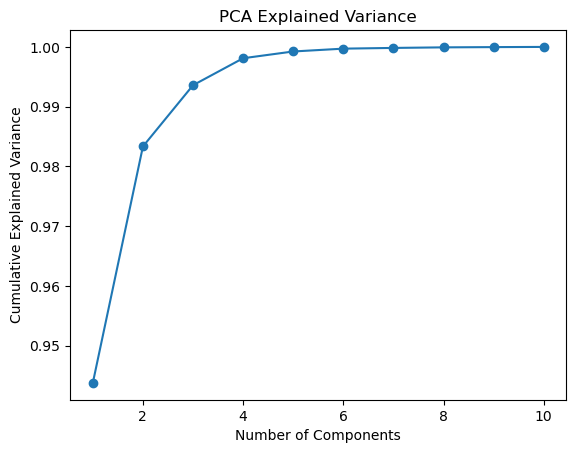

In [18]:
pca = PCA(n_components=10)
df_pca = pca.fit_transform(df_scaled)

plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

We can see from the plot that with 2 components we can get very good Cumulative Explained Variance and as we want to display the data using scatter plot in the next step we use only two components 

In [23]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, index=df.index)
df_pca.head()

,0,1
Ticker,,
AAVE-USD,46.345311,14.435361
ARB-USD,-10.462432,0.811608
AXS-USD,-8.035780,0.039209
CRO-USD,-10.420077,0.804136
DAI-USD,-10.079831,0.752034


#### Display the data 

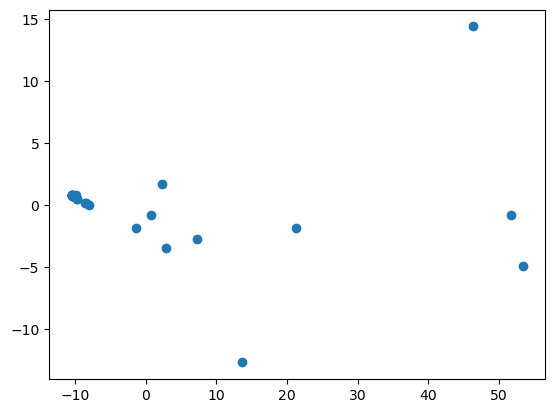

In [24]:
plt.scatter(df_pca[0],df_pca[1])
plt.show()

#### Using K-means to group this data with four groups 

First lets check how many groups does the elbow method suggests 

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

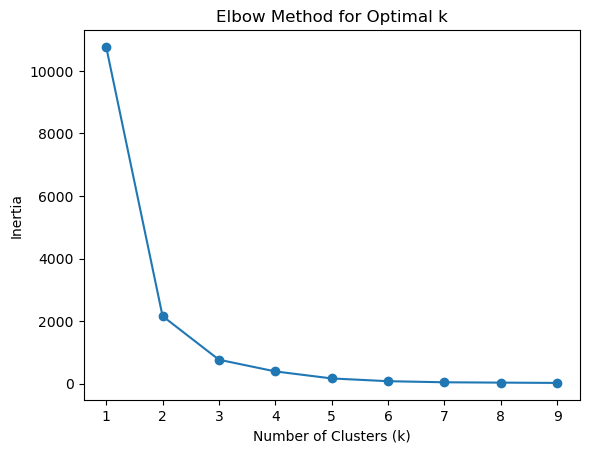

In [25]:
inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

We can see that may be three groups is enough for this data set but as the assessment requires we will do with 4 groups 

In [26]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_pca)

#Lets see the groups and how many crypto is in each group 
df_clusters = pd.DataFrame({'Crypto': df.index, 'Cluster': clusters})
print (df_clusters.Cluster.value_counts())
df_clusters

Cluster
0    20
3     5
1     3
2     2
Name: count, dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Crypto,Cluster
0,AAVE-USD,1
1,ARB-USD,0
2,AXS-USD,0
3,CRO-USD,0
4,DAI-USD,0
5,DASH-USD,3
6,EGLD-USD,3
7,FET-USD,0
8,FIL-USD,0
9,FTT-USD,0


Lets now visualize the data with groups 

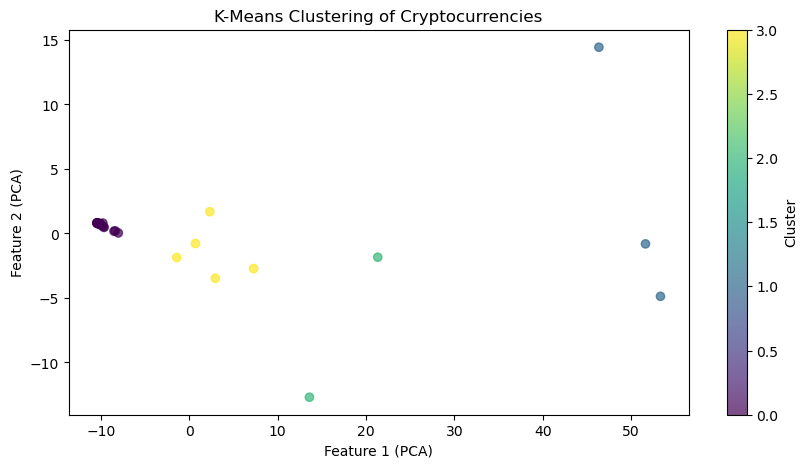

In [27]:
plt.figure(figsize=(10, 5))
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1],c=clusters, alpha=0.7)
plt.title('K-Means Clustering of Cryptocurrencies')
plt.xlabel('Feature 1 (PCA)')
plt.ylabel('Feature 2 (PCA)')
plt.colorbar(label='Cluster')
plt.show()